In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Ayush Bhagirath\Downloads\daily_kpi.csv")
df = df[df['Date'] != 'Grand Total']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()

,Date,Sum of Revenue,Count of Invoice,AOV
0,2010-12-01,58635.56,3108,18.87
1,2010-12-02,46207.28,2109,21.91
2,2010-12-03,45620.46,2202,20.72
3,2010-12-05,31383.95,2725,11.52
4,2010-12-06,53860.18,3878,13.89


In [2]:
df.rename(columns={
    'Sum of Revenue': 'Revenue',
    'Count of Invoice': 'Orders'
}, inplace=True)

In [3]:
from scipy.stats import zscore

df['rev_z'] = zscore(df['Revenue'])
df['ord_z'] = zscore(df['Orders'])
df['aov_z'] = zscore(df['AOV'])

In [4]:
df['Anomaly'] = (
    (df['rev_z'].abs() > 3) |
    (df['ord_z'].abs() > 3) |
    (df['aov_z'].abs() > 3)
)
df[df['Anomaly']][['Date','Revenue','Orders','AOV']]

,Date,Revenue,Orders,AOV
26,2011-01-11,67817.13,1454,46.64
235,2011-09-20,109286.21,1718,63.61
262,2011-10-21,62961.26,1404,44.84
282,2011-11-14,112141.11,3597,31.18
295,2011-11-29,72219.20,4313,16.74
300,2011-12-05,57751.32,5331,10.83
303,2011-12-08,81417.78,4940,16.48


In [5]:
df.loc[df['Anomaly'], ['Date','Revenue','Orders','AOV','rev_z','ord_z','aov_z']]

,Date,Revenue,Orders,AOV,rev_z,ord_z,aov_z
26,2011-01-11,67817.13,1454,46.64,2.062457,-0.389549,4.241048
235,2011-09-20,109286.21,1718,63.61,4.447699,-0.070913,6.762436
262,2011-10-21,62961.26,1404,44.84,1.783154,-0.449897,3.973606
282,2011-11-14,112141.11,3597,31.18,4.611909,2.196952,1.944015
295,2011-11-29,72219.20,4313,16.74,2.315658,3.061131,-0.201468
300,2011-12-05,57751.32,5331,10.83,1.483486,4.289809,-1.079571
303,2011-12-08,81417.78,4940,16.48,2.844747,3.817891,-0.240099


## Business Insights

- Revenue spikes were observed on specific dates, likely driven by promotions, seasonal demand, or bulk purchases.
- High order volumes with lower AOV indicate discount-driven sales behavior.
- Early detection of KPI anomalies helps businesses take proactive action and prevent potential revenue leakage.

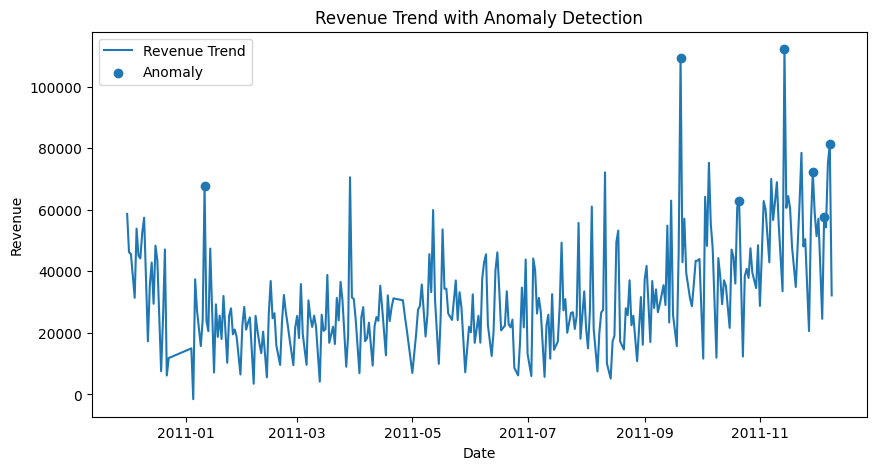

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Revenue'], label='Revenue Trend')

# Highlight anomaly days
anomaly_data = df[df['Anomaly'] == 1]
plt.scatter(anomaly_data['Date'], anomaly_data['Revenue'], label='Anomaly')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Trend with Anomaly Detection')
plt.legend()
plt.show()

In [7]:
df.to_csv("kpi_anomaly_output.csv", index=False)

In [11]:
total_anomaly_days = df['Anomaly'].sum()
total_anomaly_days


np.int64(7)